# [1] Data Overview

### **Objective:**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## 1.1 importing modules and reading Data

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## 1.2 Data Overviewing and EDA

Analyze the features included in the dataset such as ph, hardness, solids, chloramines, sulfate, etc. to make predictions about the safety of unseen water samples.

In [7]:
df=pd.read_excel(r"/content/water_potability.xlsx")

In [8]:
#df = df.drop(3)

In [9]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


<font size='5'> **Data Description :** </font>

- **ph** : pH of 1. water (0 to 14).
- **Hardness** : Capacity of water to precipitate soap in mg/L.
- **Solids** : Total dissolved solids in ppm.
- **Chloramines** : Amount of Chloramines in ppm.
- **Sulfate** : Amount of Sulfates dissolved in mg/L.
- **Conductivity** : Electrical conductivity of water in μS/cm.
- **Organic_carbon** : Amount of organic carbon in ppm.
- **Trihalomethanes** : Amount of Trihalomethanes in μg/L.
- **Turbidity** : Measure of light emiting property of water in NTU.
- **Potability** : Indicates if water is safe for human consumption. Potable -1 and Not potable -0



Detailed Features:

- **pH value**: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

- **Hardness**: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

- **Solids** (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

- **Chloramines**: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

- **Sulfate**: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

- **Conductivity**: Pure water is not a good conductor of electric current rather's a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

- **Organic_carbon**: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

- **Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

- **Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

- **Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable

#### Determining the dimensions of the dataset by retrieving the count of rows and columns.

In [11]:
df.shapea

(3276, 10)

#### Generating an overview of descriptive statistics.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


**Statistical notes to be looked at**

- Based on the mean-median values of the 9 input variables, our input variables seem to have very close to normal distibution with slight skewness.
- from the colored bars, columns are wide scaled and have much difference in scaling so it may be needed to be standrized if we're going to use algorithms with gradient descent
- ph, Sulfate columns has many null data
- more than 60% of water samples are not potable

#### Obtaining insightful information regarding the dataset's attributes and their characteristics.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


No cell is in wrong format ,so there's no need to convert its type.

#### Displaying the count of unique attributes within the dataset.

In [14]:
df.apply(lambda x: x.nunique())

,0
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


# [2] Data Preprocessing

- Handle duplicates: Remove duplicated values in the dataset if present.

- Handle missing values: Impute or remove missing values in the dataset.

- Handle outliers: Identify and handle outliers if present in the dataset.

- Handle scaling of data: Normalize or standardize features to bring them to a similar scale.

- Handle correlation: Remove or reduce multicollinearity among features.

- Handle splitting of data: Split the dataset into training and testing sets.

- Handle Imbalance of data: Balance the classes in the dataset using techniques like resampling.


### 2.1 Duplicates.

#### Verifying the dataset for any duplicated rows or instances of identical records to ensure data integrity and identify potential redundancies.

In [15]:
df.duplicated().sum()

0

- There are no duplicated rows present within the dataset, indicating a absence of identical records or redundancies among the data entries.

### 2.2 Missing Values.

#### Inspecting each column to identify and analyze the presence of missing or null values within the dataset.

In [16]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [17]:
columns = ['ph',  'Sulfate',  'Trihalomethanes']

for column_name in columns:
    # Calculate skewness
    skewness = df[column_name].skew()

    # Print skewness
    print(f"Skewness of {column_name}: {skewness}")

Skewness of ph: 0.025630447632194225
Skewness of Sulfate: -0.03594662160705914
Skewness of Trihalomethanes: -0.08303067407902293


the distribution of ph,sulfate ,trihalmothanes is almost normal but sulfate and trihalmothanes distribution are slighthly negative-skewed.

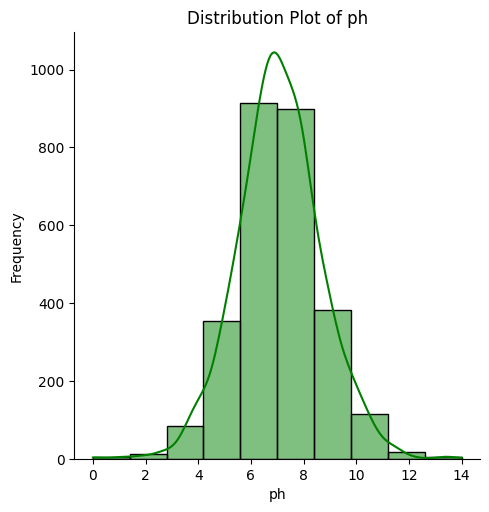

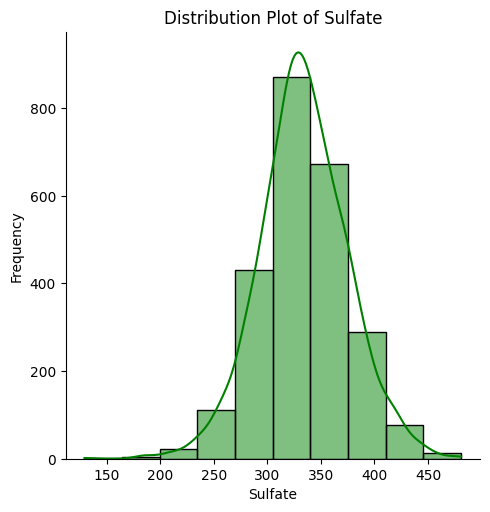

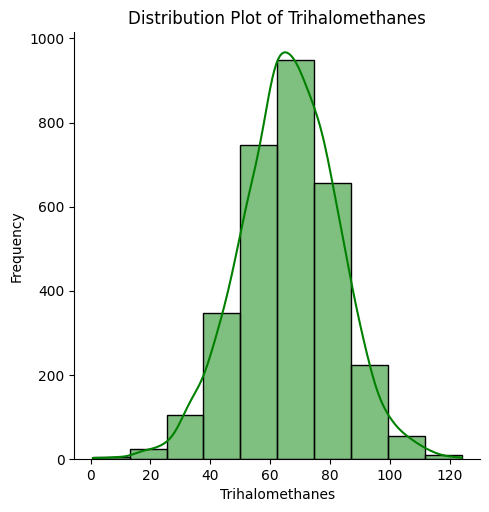

In [18]:
columns = ['ph',  'Sulfate',  'Trihalomethanes']

for column_name in columns:
    # Create a distribution plot (displot)
    sns.displot(df[column_name], bins=10, kde=True, color='green', edgecolor='black')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column_name}')

    # Show the plot
    plt.show()

For addressing missing values in Categorical data. One common strategy is to replace null values with the mean for normally distributed data and median for skewed data.

In [19]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('median'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('median'))

After imputation, the dataset is re-examined to confirm that there are no remaining null values. This verification is performed using a method that checks for null values across all columns in the dataset.

In [20]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


The dataset now contains no null values, ensuring that it is complete and ready for further analysis or modeling tasks.

### 2.3 Outliers.

In [21]:
columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
for col in columns:
    fig = px.box(df, x=col, title=f'Box Plot for {col}')
    fig.show()

Calculating how much outliers there is.

In [22]:
def calculate_percentage_and_count_of_outliers(data, columns):
    outlier_statistics = []

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = (Q3 - Q1)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

        # Count outliers
        num_of_outliers = outliers.sum()

        # Calculate percentage of outliers
        percentage_of_outliers = (num_of_outliers / len(data[col])) * 100

        # Append results to the list
        outlier_statistics.append({
            'Column': col,
            'Percentage of outliers': percentage_of_outliers,
            'Number of outliers': num_of_outliers
        })

    return pd.DataFrame(outlier_statistics)

In [23]:
columns_to_analyze = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
outlier_statistics = calculate_percentage_and_count_of_outliers(df, columns_to_analyze)

print(outlier_statistics)

            Column  Percentage of outliers  Number of outliers
0               ph                4.334554                 142
1         Hardness                2.533578                  83
2           Solids                1.434676                  47
3      Chloramines                1.862027                  61
4          Sulfate                8.058608                 264
5     Conductivity                0.335775                  11
6   Organic_carbon                0.763126                  25
7  Trihalomethanes                1.648352                  54
8        Turbidity                0.579976                  19


**Data analysis**

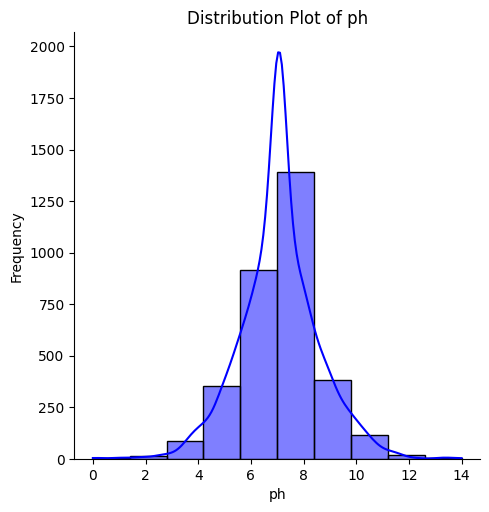

Skewness of ph: 0.02767213258943712


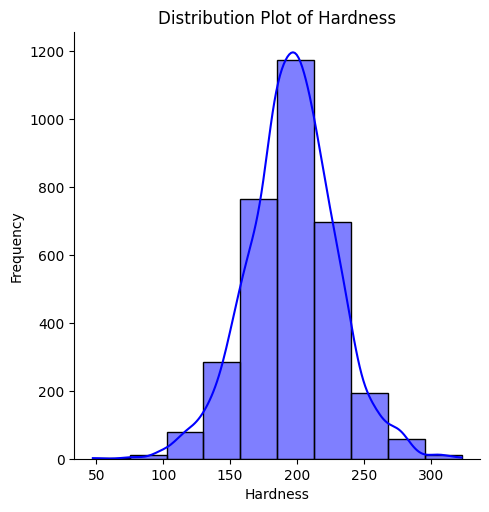

Skewness of Hardness: -0.0393417047767278


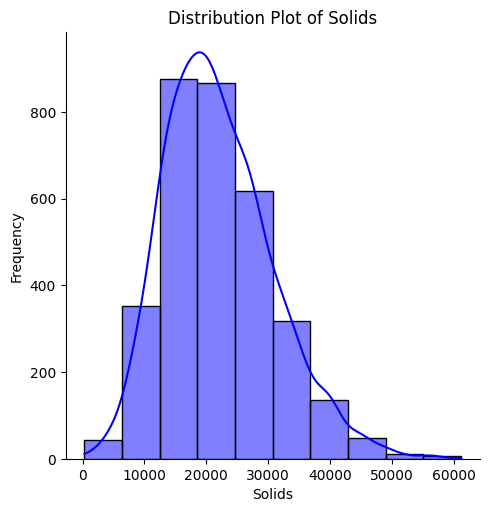

Skewness of Solids: 0.6216344855169145


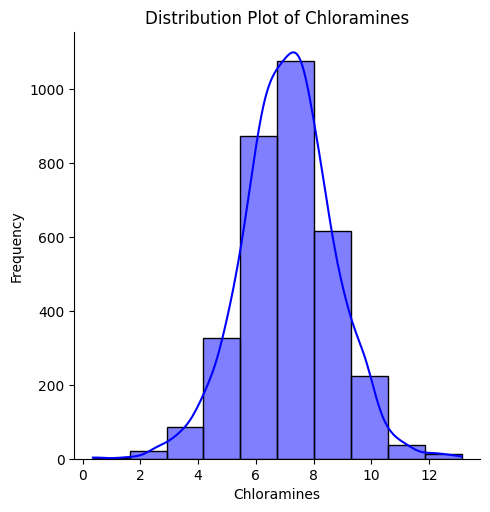

Skewness of Chloramines: -0.012098440124395711


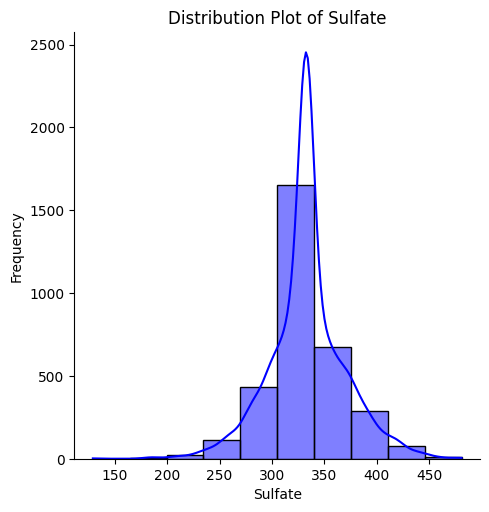

Skewness of Sulfate: -0.022012761444714774


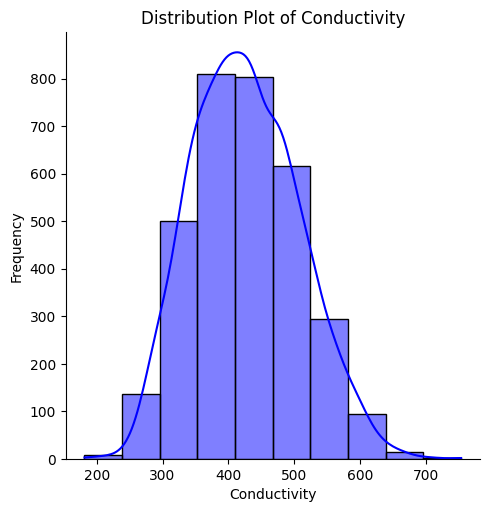

Skewness of Conductivity: 0.2644902239264124


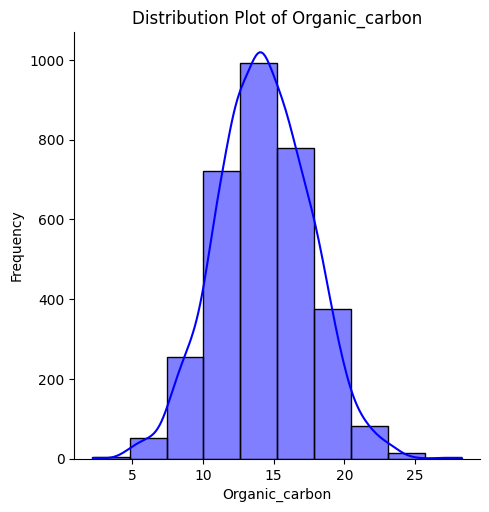

Skewness of Organic_carbon: 0.025532582090252255


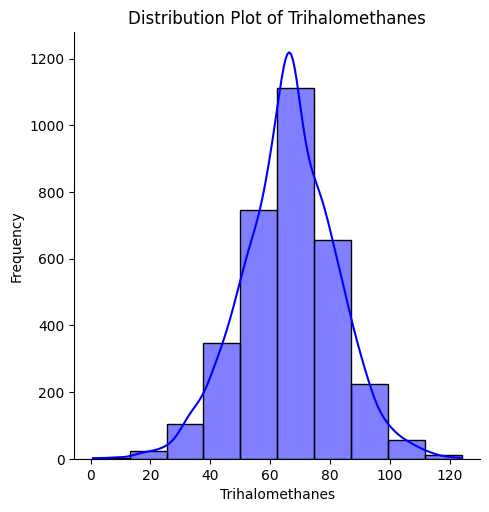

Skewness of Trihalomethanes: -0.08696797890733418


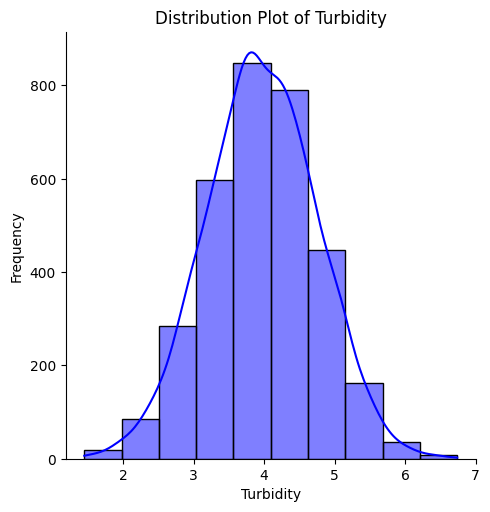

Skewness of Turbidity: -0.007816642377393676


In [24]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for column_name in columns:
    # Create a distribution plot (displot)
    sns.displot(df[column_name], bins=10, kde=True, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot of {column_name}')

    # Show the plot
    plt.show()

    # Calculate skewness
    skewness = df[column_name].skew()

    # Print skewness
    print(f"Skewness of {column_name}: {skewness}")


**Ph** : If the pH of water is too high or too low, the aquatic organisms living within it will die. pH can also affect the solubility and toxicity of chemicals and heavy metals in the water. The majority of aquatic creatures prefer a pH range of 6.5-9.0, though some can live in water with pH levels outside of this range.

**Hardness** : Water described as “hard” contains high amounts of naturally occurring dissolved calcium and magnesium. Total hardness is the sum of the calcium and magnesium concentrations, both expressed as calcium carbonate, in milligrams per liter (mg/L). You can determine your water’s hardness based on these concentrations of calcium carbonate:

- below 75 mg/L - is generally considered soft
- 76 to 150 mg/L - moderately hard
- 151 to 300 mg/L - hard
- more than 300 mg/ - very hard

**Solids** : Total solids also affect water clarity. Higher solids decrease the passage of light through water, thereby slowing photosynthesis by aquatic plants. Water will heat up more rapidly and hold more heat; this, in turn, might adversely affect aquatic life that has adapted to a lower temperature regime.

**Chloramines** : Chloramines have been used by water utilities since the 1930s. More than one in five Americans uses drinking water treated with chloramines.

Water that contains chloramines and meets EPA regulatory standards is safe to use for:

- Drinking
- Cooking
- Bathing
- Other household uses but water containing Chloramines can combine with organic matter in water to produce toxic chemicals such as iodoacids and nitrosamines. According to David Sedlak of the University of California Berkeley

**Sulfates** : Sulfates are not considered toxic to plants or animals at normal concentrations. In humans, concentrations of 500 - 750 mg/L cause a temporary laxative effect. However, doses of several thousand mg/L did not cause any long-term ill effects. At very high concentrations sulfates are toxic to cattle. Problems caused by sulfates are most often related to their ability to form strong acids which changes the pH. Sulfate ions also are involved in complexing and precipitation reactions which affect solubility of metals and other substances.

**Conductivity** : Conductivity is useful as a general measure of water quality. Each water body tends to have a relatively constant range of conductivity that, once established, can be used as a baseline for comparison with regular conductivity measurements. Significant changes in conductivity could then be an indicator that a discharge or some other source of pollution has entered the aquatic resource.

**TOC (Total Organic Carbon Content)** : Water therefore needs to be continually monitored for signs of change in the TOC content to check it is safe for consumption. While many countries do not specifically regulate for TOC levels, the concentrations of specific volatile organic compounds are covered by legislation and recommended levels of TOC are 0.05 ml/l or less.3.

**Total trihalomethanes (TTHM)** : are a group of disinfection byproducts that form when chlorine compounds that are used to disinfect water react with other naturally occurring chemicals in the water. They are colorless, and will evaporate out of the water into the air.




In [25]:
def show_distributions(data, col):
    # Create subplots
    fig = make_subplots(
        rows=1, cols=4,
        subplot_titles=['Original Distribution', 'Log Transformation', 'Cubic Root Transformation', 'Square Root Transformation']
    )

    # Plotting the original distribution
    fig.add_trace(
        go.Histogram(x=data[col], nbinsx=30, marker=dict(color='blue')),
        row=1, col=1
    )

    # Plotting the first transformation
    fig.add_trace(
        go.Histogram(x=np.log1p(data[col]), nbinsx=30, marker=dict(color='skyblue')),
        row=1, col=2
    )

    # Plotting the second transformation
    fig.add_trace(
        go.Histogram(x=np.cbrt(data[col]), nbinsx=30, marker=dict(color='salmon')),
        row=1, col=3
    )

    # Plotting the third transformation
    fig.add_trace(
        go.Histogram(x=np.sqrt(data[col]), nbinsx=30, marker=dict(color='green')),
        row=1, col=4
    )

    # Update layout
    fig.update_layout(
        title=f'Distributions for column {col}',
        showlegend=False,
        height=400,
        width=1200  # Adjust width to accommodate the additional subplot
    )

    # Show skewness information
    skewness_info = (
        f"Original skewness = {data[col].skew():.4f}, "
        f"Log skewness = {np.log1p(data[col]).skew():.4f}, "
        f"Cubic root skewness = {np.cbrt(data[col]).skew():.4f}, "
        f"Square root skewness = {np.sqrt(data[col]).skew():.4f}"
    )
    fig.update_layout(annotations=[dict(text=skewness_info, x=0.5, y=-0.2, showarrow=False, xref='paper', yref='paper')])

    # Show the plot
    fig.show()




In [26]:
columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for col in columns:
    show_distributions(df,col)

#### The Sknewness of Solids column and Conductivity column improved and they became more normal in Square root transformation , BUT transforming them decreased the accuracies for our models.


### 2.4 DataScaling

*Objective*: Identify the range of values for each column in the dataset to understand the data distribution and prepare for scaling.

*Method*: Calculated the range of each column as the difference between the maximum and minimum values. This was achieved using the formula df.max() - df.min().

In [27]:
ranges = df.max() - df.min()

print(ranges)

ph                    14.000000
Hardness             275.692000
Solids             60906.253396
Chloramines           12.775000
Sulfate              352.030642
Conductivity         571.858866
Organic_carbon        26.100000
Trihalomethanes      123.262000
Turbidity              5.289000
Potability             1.000000
dtype: float64


*Objective*: Normalize the feature scales to ensure that no single feature dominates the model due to its scale, and to improve the convergence during training of machine learning models.

*Scaling Techniques Used*:

**MinMaxScaler**: This scaler was used for columns ['Conductivity', 'Solids', 'Hardness', 'Sulfate', 'Trihalomethanes'] to transform the data into a range between 0 and 1. This normalization is particularly useful when features have different units.

In [28]:
mm_scaler=MinMaxScaler()
columns=['Conductivity', 'Solids','Hardness' ,'Sulfate','Trihalomethanes']
for col in columns:
    df[col]=mm_scaler.fit_transform(np.array(df[col]).reshape(-1,1))

### 2.5 Correlation Analysis

*Objective*: Explore the linear relationships between features to detect any significant correlations that may impact the model performance.

*Method*: Generated a correlation heatmap using seaborn to visually assess how features relate to each other.

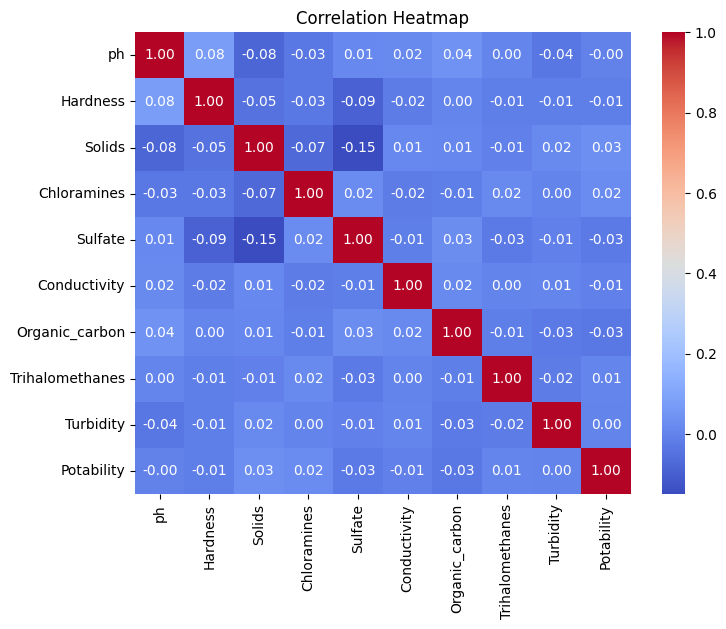

In [29]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
x=df.drop(['Potability'],axis=1)
y=df['Potability']

#### Although there is very low correlation between some features and the target column , However dropping them decreased the accuracies of our models.

### 2.6 Data Splitting

Objective: Split the dataset into features (x) and the target variable (y) for subsequent modeling. This separation is crucial for supervised learning tasks.

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [32]:
y_train.value_counts()

,count
Potability,
0,1598
1,1022


### 2.7 Balancing Data

**Application of SMOTE for Balancing Dataset**

*Objective*: Address the class imbalance within the training dataset to prevent model bias toward the majority class.

*Method*: Used SMOTE, an oversampling technique that synthesizes new examples from the minority class, thereby balancing the class distribution. This helps in improving model performance by providing more examples for the underrepresented class, which aids in better generalization during training.

*Parameters*:

- random_state: Ensured reproducibility of results by setting the random state to 42.
- k_neighbors: Configured the SMOTE algorithm to consider 7 nearest neighbors for generating synthetic samples. This parameter helps in determining how new examples are synthesized based on the minority class characteristics.

In [33]:
smote=SMOTE(random_state=42,k_neighbors=7)
x_train,y_train = smote.fit_resample(x_train,y_train)

In [34]:
y_train.value_counts()

,count
Potability,
0,1598
1,1598


# [3] Modelling

## 3.1 Implementing Classification Models

*  **Choose** and implement different classification models such as Logistic Regression,Random forest,KNN..etc
*  **Improve** model using grid search, random search and K cross validation.
*  **Evaluate** the performance of each classifier using metrics like accuracy, precision, recall, and F1-score.

## 3.2 Import Libraries

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

## 3.3.1 K-Nearest Neighbors Model.

#### Tuning hyper paramters

*  n_neighbors
  
  1. It specifies the number of nearest neighbors to consider
     when making predictions for a new data point.

  2. Using an odd number ensures that there's no tie when determining the
     majority class among the nearest neighbors.



   


   



In [36]:
knn_model = KNeighborsClassifier()

##### Cross Validation and GridSearch

*  **GridSearchCV Function** automates the process of hyperparameter tuning by systematically searching through the hyperparameter space,
evaluating model performance using cross-validation,
and selecting the best combination of hyperparameters to optimize the model's performance.

In [37]:
knn_param_grid = grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19,21,23,25,27]}

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)

knn_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]})

In [38]:
print("Mean cross-validation scores:")
means=knn_grid_search.cv_results_['mean_test_score']
params=knn_grid_search.cv_results_['params']

for mean_score, param in zip(means, params):
 print(f"{mean_score:.3f} for {param}")

Mean cross-validation scores:
0.622 for {'n_neighbors': 3}
0.615 for {'n_neighbors': 5}
0.594 for {'n_neighbors': 7}
0.587 for {'n_neighbors': 9}
0.590 for {'n_neighbors': 11}
0.594 for {'n_neighbors': 13}
0.591 for {'n_neighbors': 15}
0.589 for {'n_neighbors': 17}
0.586 for {'n_neighbors': 19}
0.580 for {'n_neighbors': 21}
0.583 for {'n_neighbors': 23}
0.580 for {'n_neighbors': 25}
0.580 for {'n_neighbors': 27}


In [39]:
# Get the best parameters and the best score
best_params = knn_grid_search.best_params_
best_score = knn_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_neighbors': 3}
Best Score: 0.62172877543036


* **We chose n_neighbors to be 23.**

##### Note: we used data without oversampling for training the model.

#### Performance Evaluation

In [40]:
y_pred=knn_grid_search.predict(x_test)
y_pred_train=knn_grid_search.predict(x_train)

In [41]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train,y_pred_train)*100:.1f}")

print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.1f}")

Metrics train:
	Accuracy score: 81.5
Metrics Test:
	Accuracy score: 53.2


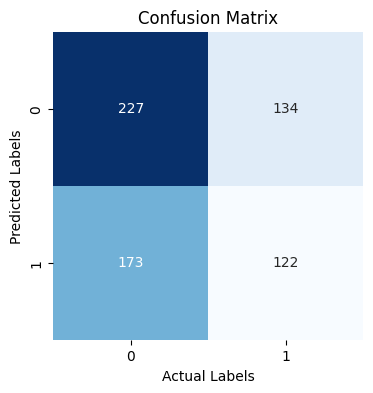

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm.T, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

In [43]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       400
           1       0.41      0.48      0.44       256

    accuracy                           0.53       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.54      0.53      0.54       656



## 3.3.2 Desicion Tree Model


### Tuning hyper paramters
*  min_samples_split
  
  1. This hyperparameter determines the minimum number of samples required
   to split an internal node during the construction of the decision tree.
  
  2. If the number of samples at a node is less than min_samples_split,the
   node will not be split further, and it will become a leaf node.
   
*  max_depth

  1. This hyperparameter determines the maximum depth of the decision tree.

  2. Setting max_depth limits the maximum number of levels in the decision
   tree, preventing it from growing too deep and capturing noise in the data



In [44]:
min_samples_split_list = [2,10,20, 30, 50,70, 100,150, 200, 300, 700]
max_depth_list = [1,2, 3, 4,8,10,16,20,25, 32, 64, None]

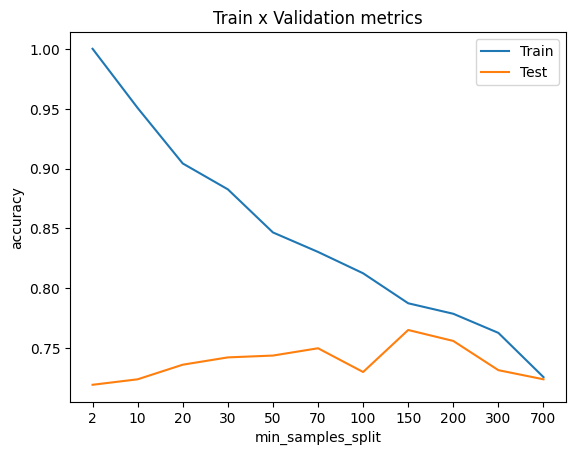

In [46]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train)

    predictions_val = model.predict(x_test)

    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

* **We chose min_samples_split to be 150.**

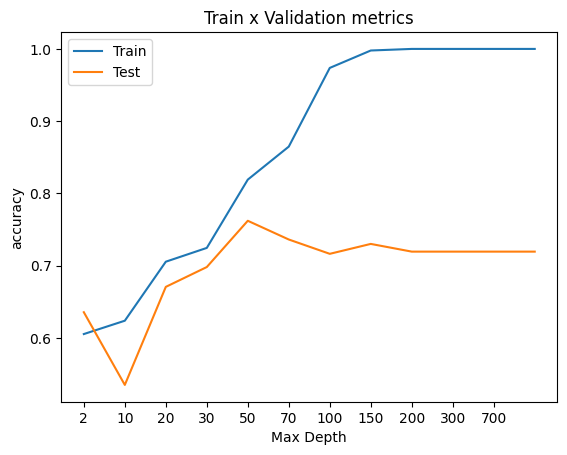

In [49]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset

    predictions_val = model.predict(x_test) ## The predicted values for the test dataset

    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

* **We chose max_depth to be 30.**

In [50]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 150,
                                             max_depth = 30,
                                             random_state = 42)

#### Cross Validation

In [51]:
# Perform cross-validation
cv_scores = cross_val_score(decision_tree_model, x_train, y_train, cv=10)
decision_tree_model.fit(x_train,y_train)

# Print accuracies for each fold
print("Cross-validation accuracies:", cv_scores)

Cross-validation accuracies: [0.775      0.703125   0.721875   0.75       0.725      0.7375
 0.75548589 0.69592476 0.68652038 0.69278997]


In [52]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_split=150, random_state=42)

### Performance Evaluation

In [53]:
y_pred_train=decision_tree_model.predict(x_train)
y_pred=decision_tree_model.predict(x_test)

In [54]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train,y_pred_train)*100:.1f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.1f}")

Metrics train:
	Accuracy score: 78.8
Metrics Test:
	Accuracy score: 76.5


[Text(0.36964285714285716, 0.9642857142857143, 'x[4] <= 0.58\ngini = 0.5\nsamples = 3196\nvalue = [1598, 1598]'),
 Text(0.12857142857142856, 0.8928571428571429, 'x[4] <= 0.576\ngini = 0.476\nsamples = 1535\nvalue = [599, 936]'),
 Text(0.07142857142857142, 0.8214285714285714, 'x[0] <= 5.514\ngini = 0.499\nsamples = 1232\nvalue = [585, 647]'),
 Text(0.04285714285714286, 0.75, 'gini = 0.287\nsamples = 144\nvalue = [119, 25]'),
 Text(0.1, 0.75, 'x[2] <= 0.221\ngini = 0.49\nsamples = 1088\nvalue = [466, 622]'),
 Text(0.07142857142857142, 0.6785714285714286, 'gini = 0.438\nsamples = 142\nvalue = [96, 46]'),
 Text(0.12857142857142856, 0.6785714285714286, 'x[4] <= 0.381\ngini = 0.476\nsamples = 946\nvalue = [370, 576]'),
 Text(0.1, 0.6071428571428571, 'gini = 0.219\nsamples = 80\nvalue = [10, 70]'),
 Text(0.15714285714285714, 0.6071428571428571, 'x[0] <= 6.734\ngini = 0.486\nsamples = 866\nvalue = [360, 506]'),
 Text(0.05714285714285714, 0.5357142857142857, 'x[3] <= 4.846\ngini = 0.498\nsample

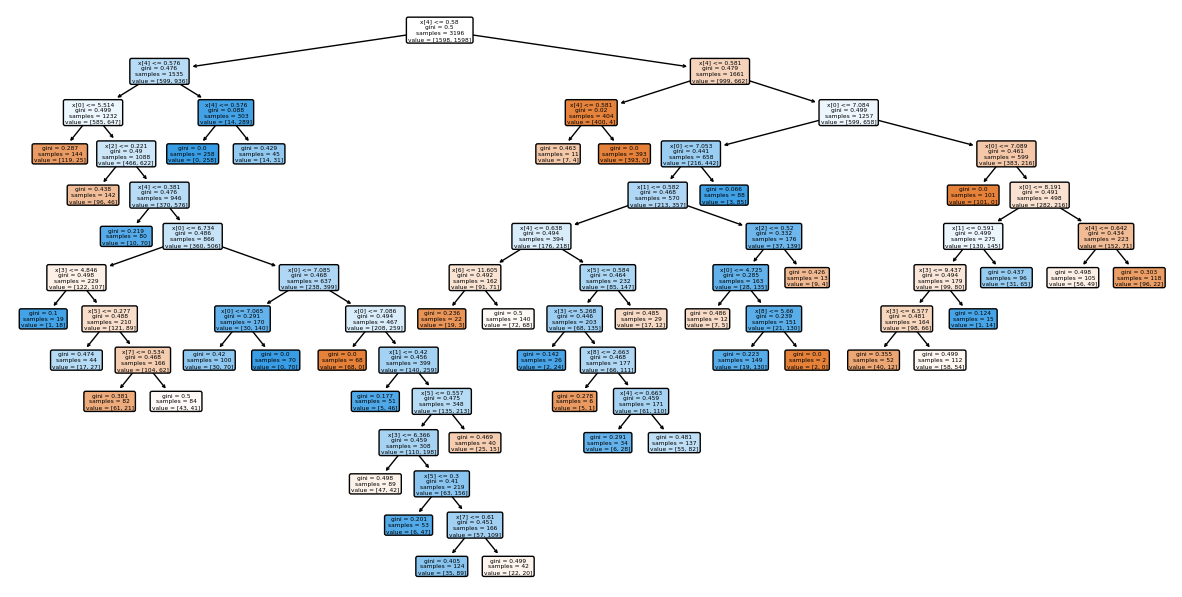

In [55]:
plt.figure(figsize=(15,7.5))
plot_tree(decision_tree_model,filled=True,rounded=True)

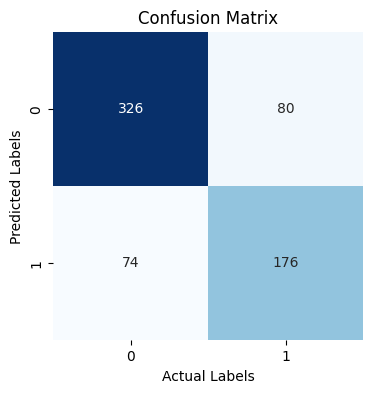

In [56]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm.T, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

In [57]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       400
           1       0.70      0.69      0.70       256

    accuracy                           0.77       656
   macro avg       0.75      0.75      0.75       656
weighted avg       0.76      0.77      0.76       656



## 3.3.3 Random Forest Model

### Tuning hyper paramters
*  min_samples_split
  
  1. This hyperparameter determines the minimum number of samples required
   to split an internal node during the construction of the decision tree.
  
  2. If the number of samples at a node is less than min_samples_split,the
   node will not be split further, and it will become a leaf node.
   
*  max_depth

  1. This hyperparameter determines the maximum depth of the decision tree.

  2. Setting max_depth limits the maximum number of levels in the decision
   tree, preventing it from growing too deep and capturing noise in the data
   
*  n_estimators

  1. It specifies the number of decision trees that will be built in the   random forest ensemble.Each decision tree in the forest is trained independently on a random subset of the training data.

  2. Increasing the value of n_estimators typically leads to a more robust and stable model, as it reduces the variance of the ensemble by averaging predictions from a larger number of trees.



In [60]:
min_samples_split_list = [2,10,20, 30, 50,70, 100,150, 200, 300, 700]
max_depth_list = [1,2, 3, 4,8,10,16,20,25, 32, 64, None]
n_estimators_list = [10,50,100,200,300,400,500]

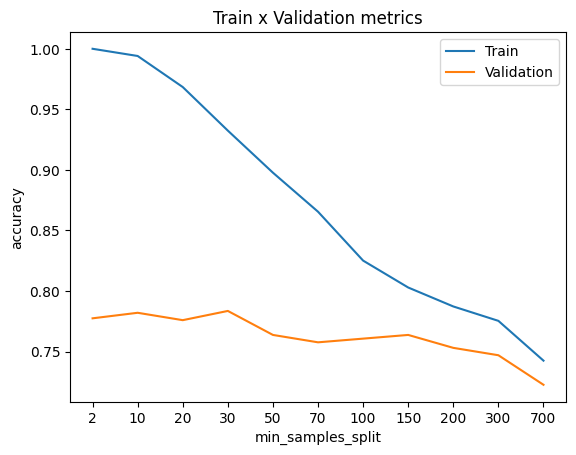

In [61]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 42,n_jobs=4).fit(x_train,y_train)
    predictions_train = model.predict(x_train)
    predictions_val = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

* **We chose min_samples_split to be 150.**

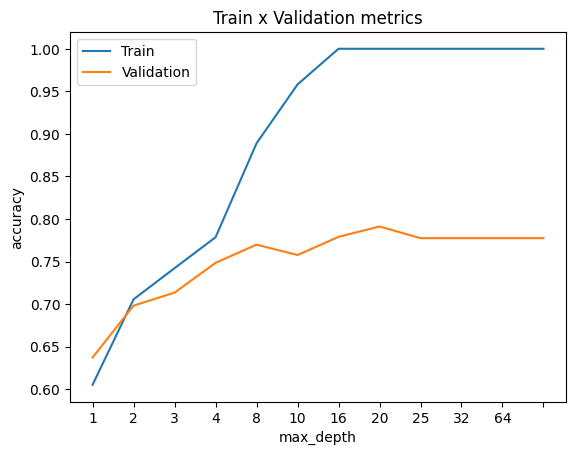

In [62]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42,n_jobs=4).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

* **We chose max_depth to be 9.**

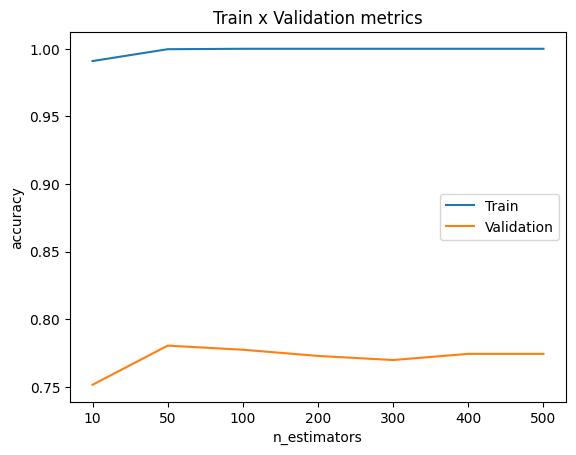

In [63]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42,n_jobs=4).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

* **We chose n_estimators to be 70.**

#### More on hyper paramters

*  criterion  

  1. It determines the function used to measure the quality of a split at
     each node.
  
  2. It specifically refers to the impurity measure used for node splitting.
   
*  n_jobs

  1. The n_jobs hyperparameter controls the number of parallel jobs to run
     during training,it specifies the maximum number of CPU cores to use to train the Random Forest model.

  2. Increasing n_jobs can lead to faster training times, especially on
     multi-core systems.




In [64]:
random_forest_model = RandomForestClassifier(criterion='entropy',
                                             n_estimators = 70,
                                             max_depth = 9,
                                             min_samples_split = 150,n_jobs=4)

In [65]:
'''# Perform cross-validation
cv_scores = cross_val_score(random_forest_model, x_train_sampled, y_train_sampled, cv=10)
random_forest_model.fit(x_train_sampled,y_train_sampled)

# Print accuracies for each fold
print("Cross-validation accuracies:", cv_scores)

DECEREASED ACCURACY!!

'''

'# Perform cross-validation\ncv_scores = cross_val_score(random_forest_model, x_train_sampled, y_train_sampled, cv=10)\nrandom_forest_model.fit(x_train_sampled,y_train_sampled)\n\n# Print accuracies for each fold\nprint("Cross-validation accuracies:", cv_scores)\n\nDECEREASED ACCURACY!!\n\n'

In [66]:
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=150,
                       n_estimators=70, n_jobs=4)

### Performance Evaluation

In [67]:
y_pred_train=random_forest_model.predict(x_train)
y_pred=random_forest_model.predict(x_test)

In [68]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train,y_pred_train)*100:.1f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.1f}")

Metrics train:
	Accuracy score: 79.8
Metrics Test:
	Accuracy score: 75.3


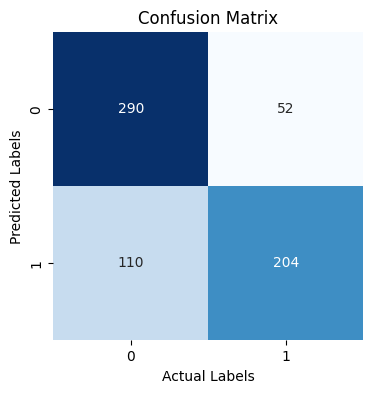

In [69]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm.T, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

## 3.3.4 Logistic Regression Model



### Tuning hyper paramters

*  C
  
  1. It is the inverse of regularization strength. Smaller values of C indicate stronger regularization, while larger values indicate weaker regularization.

  2. The hyperparameter controls the strength of regularization.
  
  3. It is used to prevent overfitting by adding a penalty term to the loss function that discourages overly complex models.
   



In [70]:
lr_model = LogisticRegression(random_state=42)

#### Cross Validation and GridSearch


In [71]:
# Define the grid of parameters to search
param_grid = {
    'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid ,cv=5, n_jobs=4)

# Perform grid search
grid_search.fit(x_train, y_train)

print("Mean cross-validation scores:")
means=grid_search.cv_results_['mean_test_score']
params=grid_search.cv_results_['params']

for mean_score, param in zip(means, params):
 print(f"{mean_score:.3f} for {param}")

Mean cross-validation scores:
0.507 for {'C': 0.0001}
0.503 for {'C': 0.001}
0.489 for {'C': 0.01}
0.484 for {'C': 0.1}
0.479 for {'C': 1}
0.479 for {'C': 10}
0.478 for {'C': 100}
0.479 for {'C': 1000}


In [72]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.0001}
Best Score: 0.5065757042253521


* **We chose C to be 0.0001.**

In [73]:
lr_model = LogisticRegression(random_state=42,C=0.0001)
lr_model.fit(x_train,y_train)

LogisticRegression(C=0.0001, random_state=42)

### Performance Evaluation

In [74]:
y_pred=lr_model.predict(x_test)
y_pred_train=lr_model.predict(x_train)

In [75]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train,y_pred_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.2f}")

Metrics train:
	Accuracy score: 51.41
Metrics Test:
	Accuracy score: 54.73


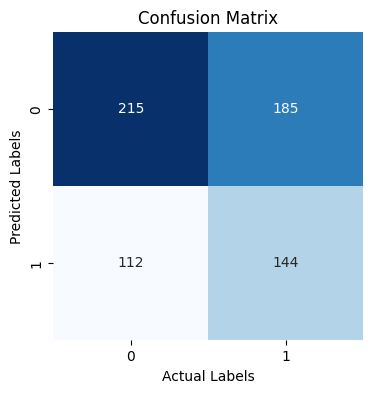

In [76]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

## 3.3.5 SVM Model


### Tuning hyper paramters

*  C

  1. The hyperparameter controls the strength of regularization.

*  Kernel
  
  1. The hyperparameter in SVM determines the type of kernel function used
     to transform the input features into higher-dimensional space.

  2. SVM uses a kernel trick to implicitly map the input features into a
     higher-dimensional space where a linear decision boundary can separate the classes.

*  gamma
  
  1. The hyperparameter is specific to the RBF kernel (kernel='rbf').
     It controls the width of the Gaussian function used in the kernel transformation
   



   


   



In [77]:
svm_model = SVC(random_state=42)

#### Cross Validation and GridSearch

In [78]:
# Define the grid of parameters to search
param_grid = {
    'C': [0.1,2,1,0.3,0.5,0.2],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],

}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=4)

# Perform grid search
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=4,
             param_grid={'C': [0.1, 2, 1, 0.3, 0.5, 0.2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [79]:
print("Mean cross-validation scores:")
means=grid_search.cv_results_['mean_test_score']
params=grid_search.cv_results_['params']

for mean_score, param in zip(means, params):
 print(f"{mean_score:.3f} for {param}")

Mean cross-validation scores:
0.489 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.490 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.489 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.570 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.483 for {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.516 for {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.483 for {'C': 2, 'gamma': 'auto', 'kernel': 'linear'}
0.599 for {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
0.485 for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.516 for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.485 for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.590 for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.487 for {'C': 0.3, 'gamma': 'scale', 'kernel': 'linear'}
0.516 for {'C': 0.3, 'gamma': 'scale', 'kernel': 'rbf'}
0.487 for {'C': 0.3, 'gamma': 'auto', 'kernel': 'linear'}
0.575 for {'C': 0.3, 'gamma': 'auto', 'kernel': 'rbf'}
0.487 for {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
0.511 for {'C':

In [80]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.5985656298904538


* **We chose the values above for our model but we change the value of C for better accuracy.**

In [81]:
svm_model = SVC(kernel='rbf', C=2, gamma='auto', random_state=42)
svm_model.fit(x_train,y_train)

SVC(C=2, gamma='auto', random_state=42)

### Performance Evaluation

In [82]:
y_pred=svm_model.predict(x_test)
y_pred_train=svm_model.predict(x_train)

In [83]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_pred_train,y_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_pred,y_test)*100:.2f}")

Metrics train:
	Accuracy score: 65.55
Metrics Test:
	Accuracy score: 56.25


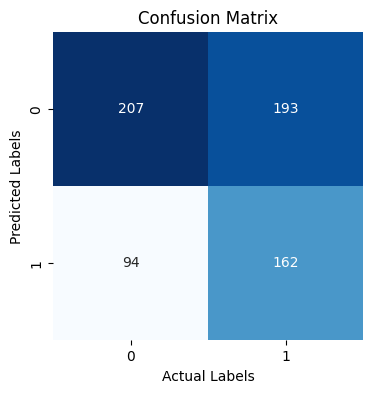

In [84]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

In [1]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:


NameError: name 'classification_report' is not defined